In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import glob 
import os

%matplotlib inline

import tensorflow as tf

In [2]:
from glob import glob
images=glob("train/**/**")

(-0.5, 79.5, 67.5, -0.5)

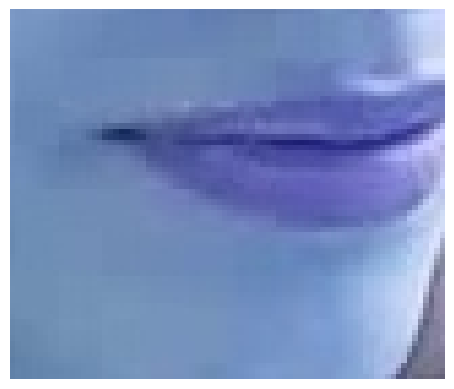

In [3]:
plt.imshow(cv2.imread(images[0]))
plt.axis('off')

In [4]:
cv2.imread(images[0]).shape

(68, 80, 3)

In [5]:
train_data=tf.keras.utils.image_dataset_from_directory("train",
                                                      image_size=(64,64),
                                                      batch_size=32,
                                                      color_mode="grayscale",
                                                      label_mode="binary",
                                                      shuffle=True)

validation_data=tf.keras.utils.image_dataset_from_directory("test",
                                                           image_size=(64,64),
                                                           batch_size=32,
                                                           color_mode='grayscale',
                                                           label_mode='binary',
                                                           shuffle=True)

Found 4812 files belonging to 2 classes.
Found 307 files belonging to 2 classes.


In [6]:
def convolution_layer(model,filters):
    model.add(tf.keras.layers.Conv2D(filters=filters,kernel_size=3,activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
    
    return model

In [7]:
def dense_layer(model,units,activation):
    
    model.add(tf.keras.layers.Dense(units=units,activation=activation))

    return model

In [8]:
def model_cnn():
    
    model=tf.keras.models.Sequential()
    
    model=convolution_layer(model,64)
    model=convolution_layer(model,128)
    
    model.add(tf.keras.layers.Flatten())
    
    model=dense_layer(model,64,'relu')
    model=dense_layer(model,1,'sigmoid')
    
    model.compile(loss=['binary_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model

In [9]:
model=model_cnn()

In [10]:
checkpoint=tf.keras.callbacks.ModelCheckpoint("model_weights.h5",monitor='val_accuracy',save_best_only=True,mode='max')
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.1, patience=2, min_lr=0.000001)

In [11]:
history=model.fit(train_data, validation_data=validation_data, epochs=20,batch_size=32, callbacks=[checkpoint,reduce_lr])

Epoch 1/20


151/151 [==============================] - 22s 127ms/step - loss: 2.4981 - accuracy: 0.8778 - val_loss: 0.3455 - val_accuracy: 0.8958 - lr: 0.0010
Epoch 2/20


C:\Users\navee\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


151/151 [==============================] - 19s 124ms/step - loss: 0.1777 - accuracy: 0.9426 - val_loss: 0.1783 - val_accuracy: 0.9283 - lr: 0.0010
Epoch 3/20
151/151 [==============================] - 18s 119ms/step - loss: 0.1288 - accuracy: 0.9570 - val_loss: 0.2515 - val_accuracy: 0.9414 - lr: 0.0010
Epoch 4/20
151/151 [==============================] - 18s 120ms/step - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.2153 - val_accuracy: 0.9381 - lr: 0.0010
Epoch 5/20
151/151 [==============================] - 19s 124ms/step - loss: 0.0969 - accuracy: 0.9692 - val_loss: 0.2779 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 6/20
151/151 [==============================] - 19s 123ms/step - loss: 0.0816 - accuracy: 0.9769 - val_loss: 0.3118 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 7/20
151/151 [==============================] - 19s 124ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.3020 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 8/20
151/151 [==============================] - 20s 129ms

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1

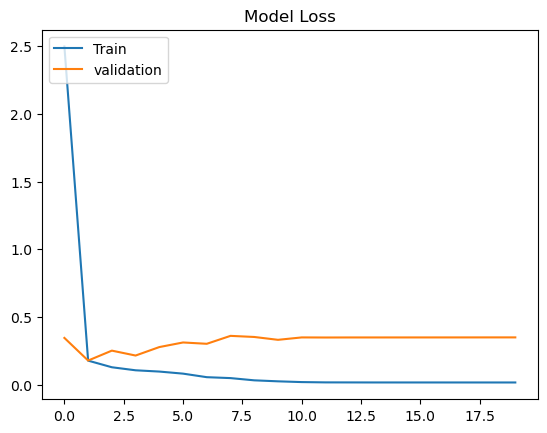

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','validation'],loc='upper left')

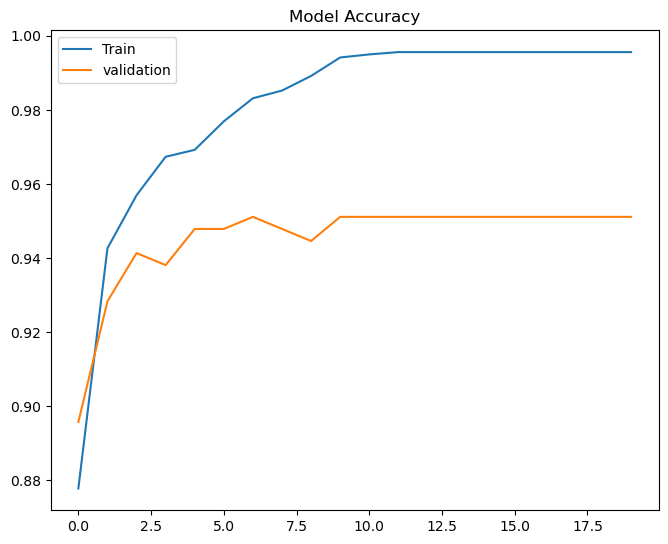

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.3)

In [15]:
model.load_weights('model_weights.h5')

In [16]:
model.evaluate(validation_data)

10/10 [==============================] - 1s 34ms/step - loss: 0.3020 - accuracy: 0.9511


[0.3020364046096802, 0.9511400461196899]

In [17]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)